In [11]:
from sklearn.metrics import accuracy_score,confusion_matrix
from Inference.Facenet import Facenet
import matplotlib.pyplot as plt
from imutils import paths
from os.path import sep
import seaborn as sns
import cv2

Load ảnh test

In [13]:
image_paths = list(paths.list_images("./Dataset/Test"))
person_img = []
person_name = []
for ip in image_paths:
    image = cv2.imread(ip)
    person_img.append(image)
    # Split bằng "/" rồi lấy tên thư mục (-1 là tên file ảnh)
    lbl = ip.split(sep)[-2]
    person_name.append(lbl)
len(person_img), len(person_name)

(60, 60)

Nhận diện

In [14]:
fn = Facenet()
person_predict = []
for pi in person_img:
    identity, _, _, _ = fn.Get_People_Identity_SVM(pi)[0]
    person_predict.append(identity)

/home/phuocleoceo/.local/lib/python3.9/site-packages/keras/layers/core/lambda_layer.py:303: UserWarning: inception_resnet_v1 is not loaded, but a Lambda layer uses it. It may cause errors.
  function = cls._parse_function_from_config(config, custom_objects,


Đánh giá

In [15]:
person_predict_acc = accuracy_score(person_name,person_predict)*100
print(f">> Accuracy : {person_predict_acc} (%)")

>> Accuracy : 100.0 (%)


Text(69.0, 0.5, 'True label')

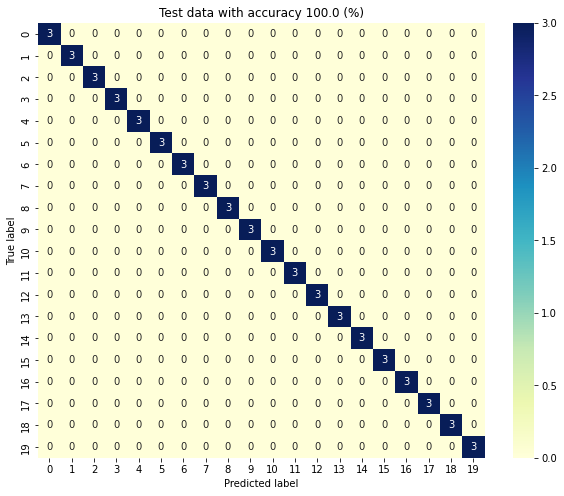

In [17]:
plt.figure(figsize=(10, 8))
plt.title(f"Test data with accuracy {person_predict_acc} (%)")
sns.heatmap(confusion_matrix(person_name, person_predict), cmap="YlGnBu", annot=True, fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')